In [1]:
from maze import Maze
from position import Position
import search as Search
import matplotlib.pyplot as plt


Building a maze and specifying intial and goal states.  
- The maze is a Maze object.  
- The initial and goal states are both Position objects 


In [2]:
maze = Maze(100, 0.2, 0)
initial_state = Position(0,0)
goal_state = Position(maze.dim-1, maze.dim-1)


Theres also a `quick_setup(dim, p, q)` function in the Search module for the lazy. 



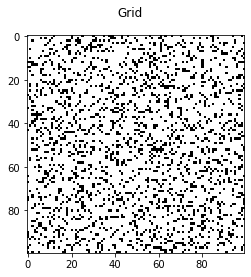

In [3]:
maze, initial_state, goal_state = Search.quick_setup(100, 0.2, 0)
f = maze.draw_grid()

## DFS 

### dfs_trivial  
Cells are pushed onto the fringe in an undefined order. 

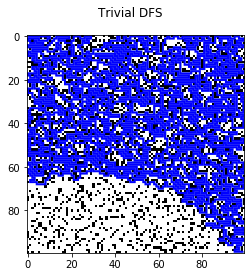

path length:		4831
total nodes expanded:	5744
max fringe size:	3614

In [4]:

success, path, metrics = Search.dfs(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "Trivial DFS")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics


### dfs_southeast
DFS where the cells are pushed onto the fringe in this priority order:  South, East, West, North   
The idea is to prioritize the direction of the goal (which is always in the southeast corner

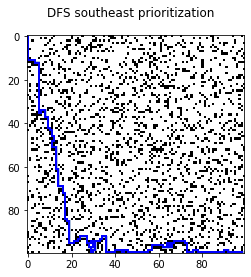

path length:		253
total nodes expanded:	274
max fringe size:	258

In [5]:
success, path, metrics = Search.dfs_southeast(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "DFS southeast prioritization")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics

### dfs_southwest
DFS where the cells are pushed onto the fringe in this priority order:  South, West, East, North   
The idea is to prioritize the direction of the goal (which is always in the southeast corner.   This function was written to solve for valid mazes (finding a valid path from northeast corner to southwest corner)

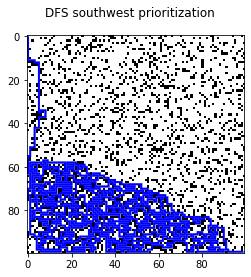

path length:		1917
total nodes expanded:	2246
max fringe size:	1489

In [6]:
success, path, metrics = Search.dfs_southwest(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "DFS southwest prioritization")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics

# BFS 

### Trivial bfs.


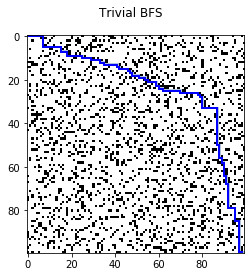

path length:		199
total nodes expanded:	8048
max fringe size:	158

In [7]:

success, path, metrics = Search.bfs(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "Trivial BFS")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics

### Bidirectional BFS 
Runs two instances of bfs.  One starts from the initial position seeking the goal position.  The other starts from the goal position and seeks the initial position.  

Warning.  Also does not scale well to `dim`.   Do not run for maze dimensions > idunno...20? 

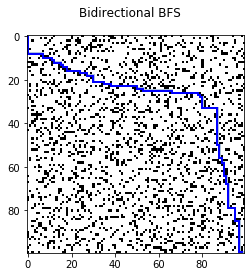

path length:		199
total nodes expanded:	7320
max fringe size:	264

In [8]:
# Also running this on the smaller maze: maze2.

success, path, metrics = Search.bid_bfs(maze, initial_state, goal_state, question='1')

if success: 
    fig = maze.draw_path(path, "Bidirectional BFS")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics

# A* 

### A* using Euclidean distance 
Euclidean distance is the L2 norm between two points. 

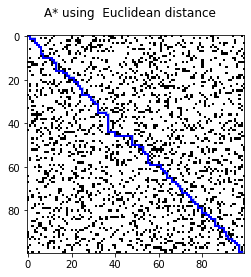

path length:		199
total nodes expanded:	7565
max fringe size:	166

In [15]:
# Also running this on the smaller maze: maze2.

success, path, metrics = Search.A_star_euc(maze, initial_state, goal_state, question='1')

if success: 
    fig = maze.draw_path(path, "A* using  Euclidean distance")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics

### A* using Manhattan distance 
Manhattan distance is the L1 norm between two points. 

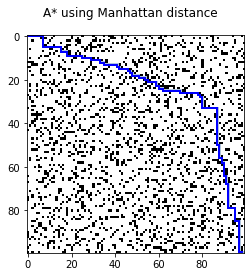

path length:		199
total nodes expanded:	5250
max fringe size:	449

In [16]:
# Also running this on the smaller maze: maze2.

success, path, metrics = Search.A_star_man(maze, initial_state, goal_state)

if success: 
    fig = maze.draw_path(path, "A* using Manhattan distance")
else:
    fig = maze.draw_grid("Maze with no solution")

plt.show(fig)      
metrics